In [2]:
from deap import tools, base, creator

import random, array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, "C:/Jupyter/Evolution")
import elitysm

In [3]:
DIMENSIONS = 2
BOUND_LOW, BOUND_UP = -512.0, 512.0

POPULATION_SIZE = 300
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
GROWDING_FACTOR = 20.0

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [4]:
def randomFloat(low,up):
    return [random.uniform(l,u) for l,u in zip ([low]*DIMENSIONS, [up]*DIMENSIONS)]

In [5]:
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))

creator.create("Individual", list, fitness=creator.FitnessMin)
,
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [6]:
def eggholder(individual):
    x= individual[0]
    y= individual[1]
    f=(-(y+47.0)*np.sin(np.sqrt(abs(x/2.0+(y+47.0))))-x*np.sin(np.sqrt(abs(x-(y+47.0)))))
    return f

toolbox.register("evaluate", eggholder)

In [7]:
toolbox.register("select", tools.selTournament, tournsize = 2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low = BOUND_LOW, up = BOUND_UP, eta = GROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low = BOUND_LOW, up = BOUND_UP, eta = GROWDING_FACTOR, indpb= 1.0/DIMENSIONS)

In [8]:
# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitysm.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot solution locations on x-y plane:
    plt.figure(1)
    globalMinima = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]
    plt.scatter(*zip(*globalMinima), marker='X', color='red', zorder=1)
    plt.scatter(*zip(*population), marker='.', color='blue', zorder=0)

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()


In [29]:
main()

TypeError: object of type 'numpy.float64' has no len()

C:\Users\posit\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\posit\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min     	avg    
0  	300   	0.077887	138.646
1  	256   	0.077887	70.3018
2  	261   	0.0549376	45.3529
3  	260   	0.0549376	34.0376
4  	253   	0.0421103	21.4902
5  	259   	0.00375114	21.5907
6  	255   	0.00163305	17.3338
7  	265   	0.00163305	19.3309
8  	252   	0.00163305	15.1737
9  	249   	0.000356589	13.0519
10 	258   	0.000356589	13.6612
11 	257   	0.00027667 	17.1779
12 	256   	0.00027667 	13.212 
13 	255   	7.48096e-05	14.0379
14 	254   	7.48096e-05	10.8216
15 	261   	2.53197e-05	8.90194
16 	258   	2.53197e-05	7.73907
17 	262   	2.53197e-05	7.43993
18 	258   	2.53197e-05	7.086  
19 	250   	7.19839e-06	5.91175
20 	252   	4.87197e-06	6.0666 
21 	256   	2.2194e-06 	4.83019
22 	252   	1.41761e-06	6.06226
23 	260   	1.41761e-06	6.66497
24 	258   	1.30806e-06	3.77568
25 	256   	1.30806e-06	3.44466
26 	264   	6.64878e-08	6.49944
27 	255   	6.64878e-08	5.88264
28 	257   	6.64878e-08	2.79407
29 	263   	6.64878e-08	4.97824
30 	252   	6.64878e-08	4.42222
31 	246   	6.09978e-08	4.72

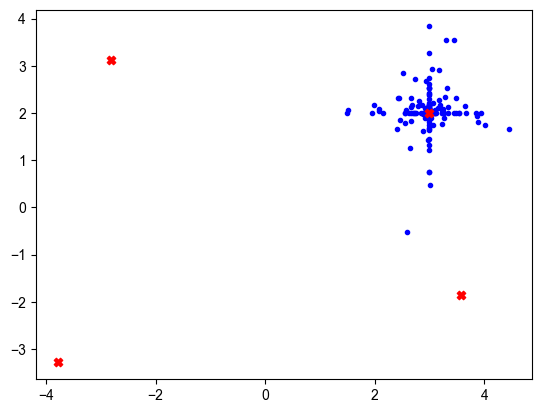

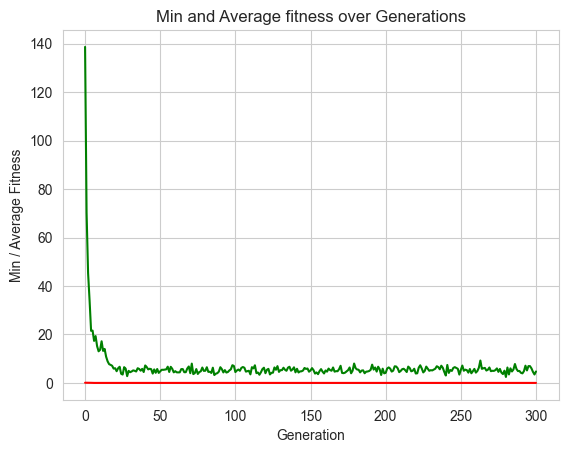

In [10]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitysm

# problem constants:
DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -5.0, 5.0  # boundaries for all dimensions

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.5   # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 300
HALL_OF_FAME_SIZE = 30
CROWDING_FACTOR = 20.0  # crowding factor for crossover and mutation

# set the random seed:
RANDOM_SEED = 42  # try also 17, 13,...
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)


# helper function for creating random float numbers uniformaly distributed within a given range [low, up]
# it assumes that the range is the same for every dimension
def randomFloat(low, up):
    return [random.uniform(a, b) for a, b in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

# create an operator that randomly returns a float in the desired range and dimension:
toolbox.register("attr_float", randomFloat, BOUND_LOW, BOUND_UP)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attr_float)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# Himmelblau function as the given individual's fitness:
def himmelblau(individual):
    x = individual[0]
    y = individual[1]
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,  # return a tuple

toolbox.register("evaluate", himmelblau)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitysm.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot solution locations on x-y plane:
    plt.figure(1)
    globalMinima = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]
    plt.scatter(*zip(*globalMinima), marker='X', color='red', zorder=1)
    plt.scatter(*zip(*population), marker='.', color='blue', zorder=0)

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()